<a href="https://colab.research.google.com/github/noelmt7/LAB-5/blob/main/2348538_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import sklearn as sks
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
data.shape

(7043, 21)

In [15]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
data = data.dropna()
data.shape

(7032, 21)

**Encoding the categorical columns using LabelEncoder:**

In [21]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in categorical_columns:
    data[column] = data[column].astype(str)
    data[column] = le.fit_transform(data[column])

# Now your categorical columns are encoded as integers
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1524,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3358,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5923,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


**Splitting the dataset into training and testing sets**

In [26]:
from sklearn.model_selection import train_test_split

# get the locations
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

**Creating a baseline logistic regression model**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0, max_iter=1000)
# Training the data on the training data
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 80.17057569296375


**Scaling the dataset to check if it increases the accuracy:**

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(random_state=0, max_iter=1000')
clf.fit(X_train_scaled, y_train)


y_pred = clf.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy after scaling (in %):", acc*100)

Logistic Regression model accuracy after scaling (in %): 80.38379530916845


Evaluating the model based on various evaluation metrics:

In [35]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have true labels (y_test) and predicted labels (y_pred)
# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.6415094339622641
Recall: 0.5528455284552846


In [36]:
from sklearn.metrics import f1_score

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("F1-score:", f1)


F1-score: 0.5938864628820961


In [37]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1])

print("ROC AUC:", roc_auc)


ROC AUC: 0.7929622841507799


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [38]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)

print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.4636704580387334


In [39]:
from sklearn.metrics import matthews_corrcoef

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient (MCC):", mcc)


Matthews Correlation Coefficient (MCC): 0.4659149568935755




---



---



Creating a confusion matrix between gender and churn

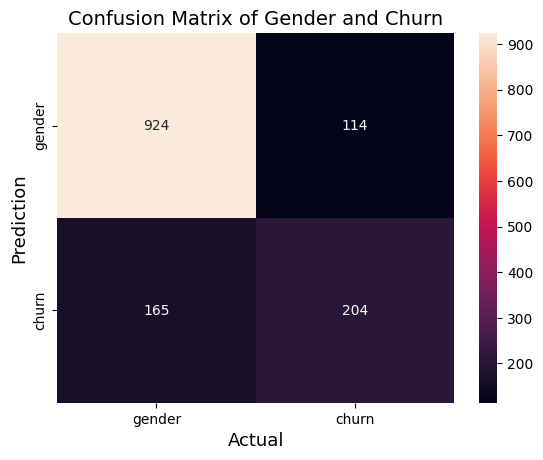

In [44]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['gender', 'churn'],
            yticklabels=['gender', 'churn'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix of Gender and Churn',fontsize=14)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


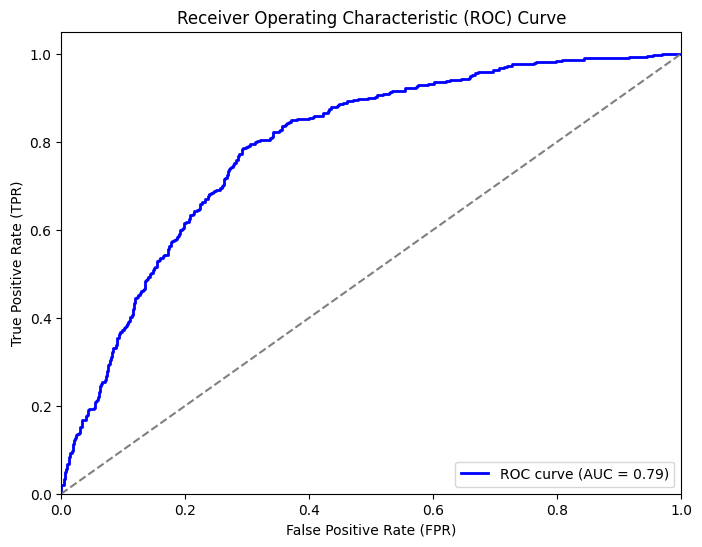

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have true labels (y_test) and predicted probabilities (y_probs) for the positive class
y_probs = clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


***AUC (Area Under Curve) lies between 1 (perfect model) and 0.5(no better than chance). The logistic regression model achieves an AUC of 0.79, which can be considered as acceptable.***

---



---

